# Mobile Price Classification

In [90]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [2]:
# reading csv file
data=pd.read_csv("train.csv")

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.shape

(2000, 21)

## Data description:
1) battery_power= Total energy a battery can store in one time measured in mAh
2) blue= Has bluetooth or not
3) clock_speed= speed at which microprocessor executes instructions
4) dual_sim= Has dual sim support or not
5) fc= Front Camera mega pixels
6) four_g= Has 4G or not
7) int_memory= Internal Memory in Gigabytes
8) m_dep= Mobile Depth in cm
9) mobile_wt= Weight of mobile phone
10) n_cores= Number of cores of processor
11) pc= Primary Camera mega pixels
12) px_height= Pixel Resolution Height
13) px_width= Pixel Resolution Width
14) ram= Random Access Memory in Megabytes
15) sc_h= Screen Height of mobile in cm
16) sc_w= Screen Width of mobile in cm
17) talk_time= longest time that a single battery charge will last when you are
18) three_g= Has 3G or not
19) touch_screen= Has touch screen or not
20) wifi= Has wifi or not
21) price_range= y= to be classified

## Exploratory Data Analysis (EDA)

In [6]:
data.info()     # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df=pd.DataFrame(data)

In [10]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
cor=df.corr()
cor

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

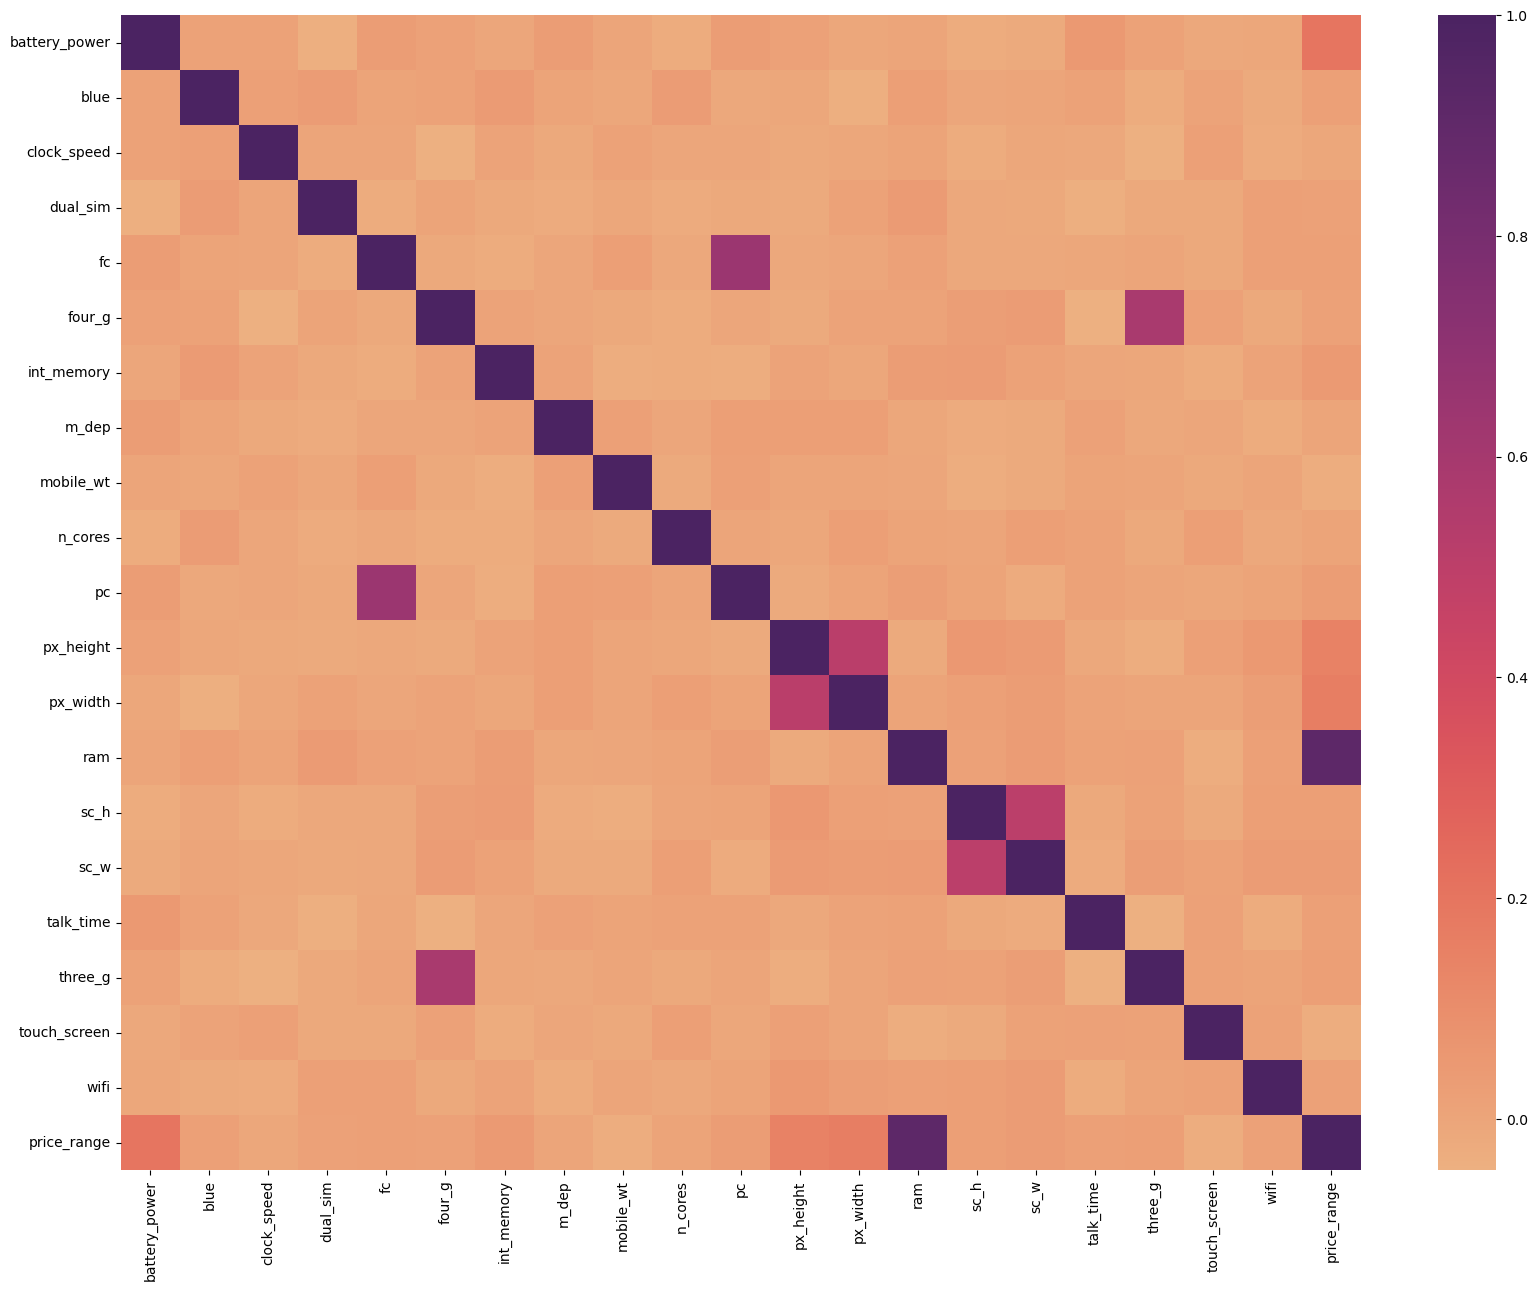

In [46]:
plt.figure(figsize=(20, 15))
sns.heatmap(cor,cmap='flare')

In [ ]:
# ram is highly correlated with price_range

<Axes: >

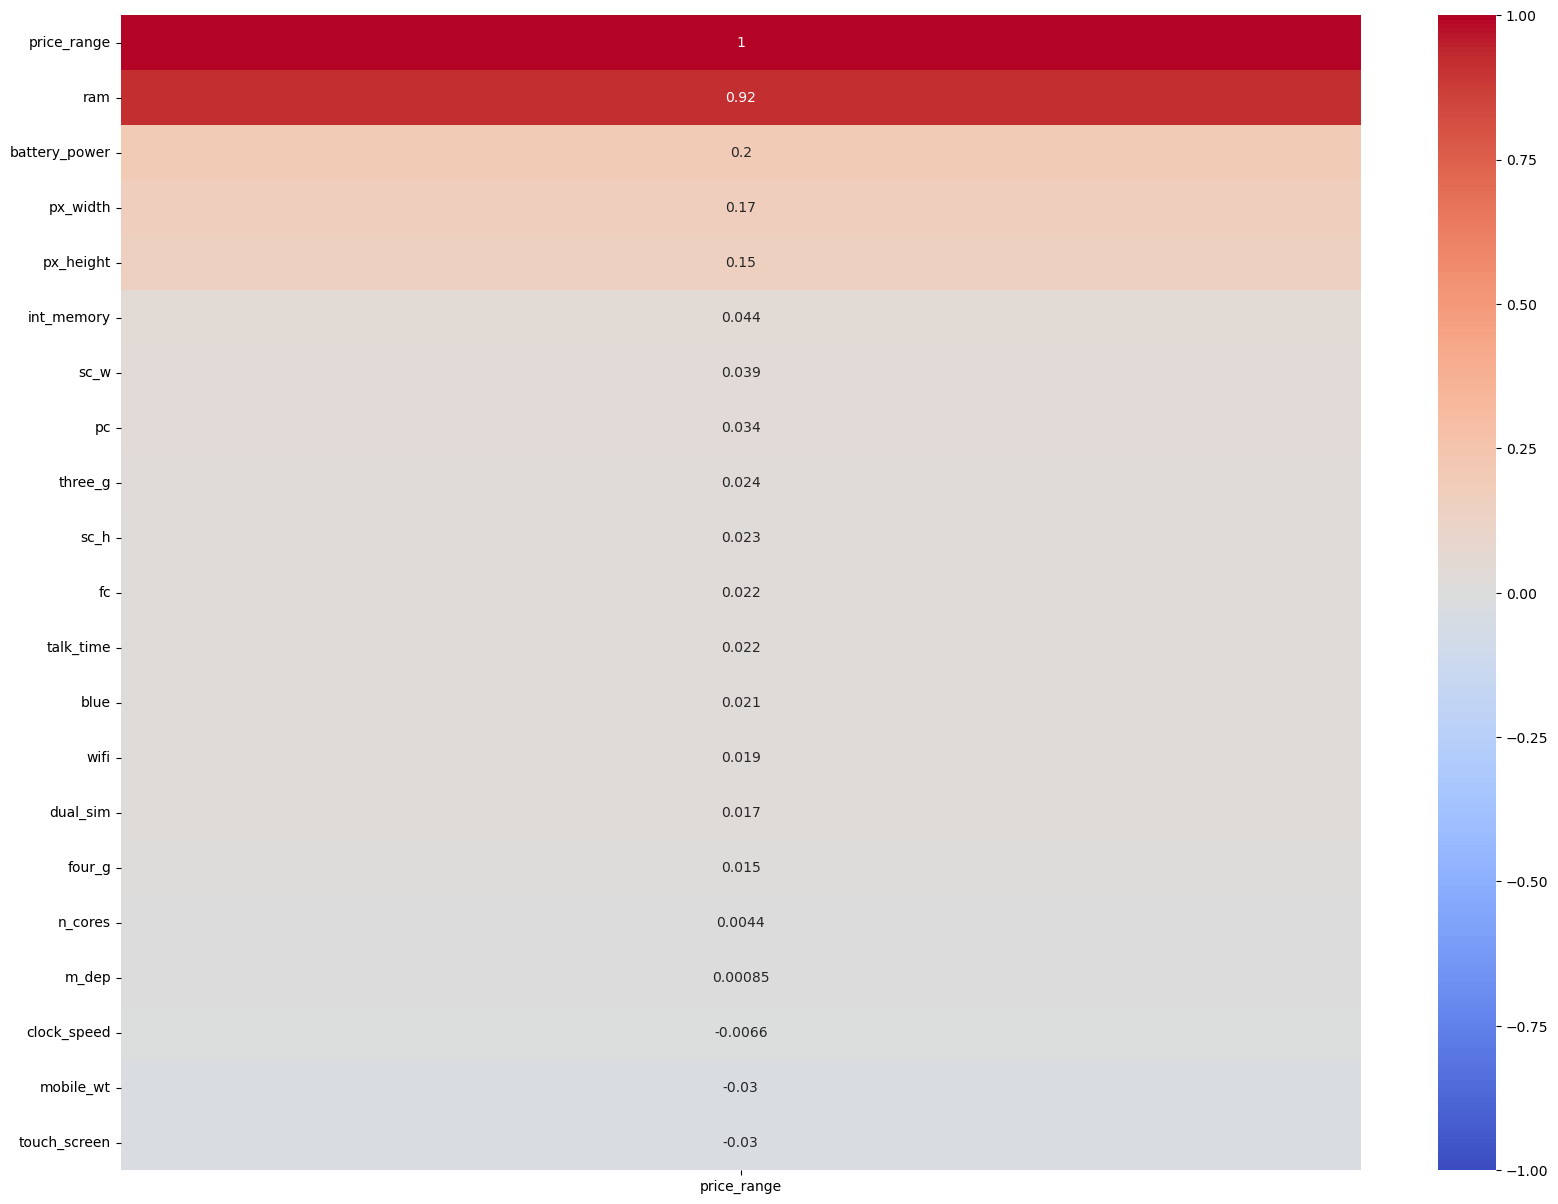

In [44]:
plt.figure(figsize=(20,15))
sns.heatmap(cor[['price_range']].sort_values(by=['price_range'],ascending=False),vmin=-1,cmap='coolwarm',annot=True)

In [51]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [70]:
x=df.iloc[:,0:20]
x.head(1)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1


In [71]:
y=df['price_range']
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

## Normalization

In [61]:
scaler=MinMaxScaler()

In [72]:
columns=x.columns
x_scaled=pd.DataFrame(scaler.fit_transform(x))
x_scaled.columns=columns
x_scaled.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


## Splitting Data

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2)

## Model Building

#### 1) Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [77]:
y_pred_train=logreg.predict(x_train)    # prediction on training data
y_pred_test=logreg.predict(x_test)    # prediction on validation data

In [91]:
# Accuracy: train
logreg_score_train = accuracy_score(y_train, y_pred_train)
logreg_score_train

0.940625

In [93]:
# Accuracy: test
logreg_score_test = accuracy_score(y_test, y_pred_test)
logreg_score_test

0.8925

In [234]:
# Logistic Regression
# Accuracy: train split: 0.94
# Accurcay: test split: 0.89

#### 2) Decision Tree: Gini

In [148]:
from sklearn.tree import DecisionTreeClassifier

dt_gini=DecisionTreeClassifier(criterion='gini',max_depth=7)
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

[Text(0.4888392857142857, 0.9375, 'x[13] <= 0.524\ngini = 0.75\nsamples = 1600\nvalue = [400, 383, 400, 417]'),
 Text(0.225, 0.8125, 'x[13] <= 0.227\ngini = 0.58\nsamples = 809\nvalue = [400, 330, 79, 0]'),
 Text(0.1375, 0.6875, 'x[11] <= 0.769\ngini = 0.179\nsamples = 353\nvalue = [318, 35, 0, 0]'),
 Text(0.09642857142857143, 0.5625, 'x[13] <= 0.213\ngini = 0.132\nsamples = 339\nvalue = [315, 24, 0, 0]'),
 Text(0.05714285714285714, 0.4375, 'x[0] <= 0.877\ngini = 0.09\nsamples = 317\nvalue = [302, 15, 0, 0]'),
 Text(0.02857142857142857, 0.3125, 'x[6] <= 0.992\ngini = 0.035\nsamples = 279\nvalue = [274, 5, 0, 0]'),
 Text(0.014285714285714285, 0.1875, 'x[12] <= 0.986\ngini = 0.022\nsamples = 275\nvalue = [272, 3, 0, 0]'),
 Text(0.007142857142857143, 0.0625, 'gini = 0.015\nsamples = 272\nvalue = [270, 2, 0, 0]'),
 Text(0.02142857142857143, 0.0625, 'gini = 0.444\nsamples = 3\nvalue = [2, 1, 0, 0]'),
 Text(0.04285714285714286, 0.1875, 'x[14] <= 0.321\ngini = 0.5\nsamples = 4\nvalue = [2, 2,

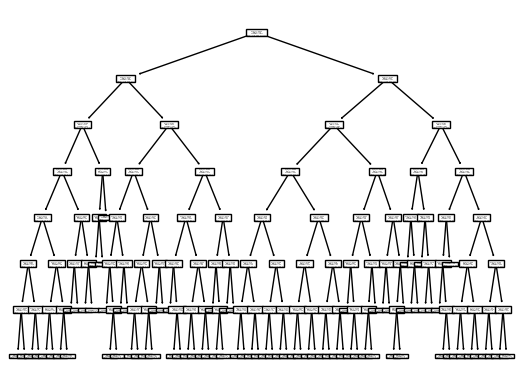

In [149]:
# Plotting decision tree
from sklearn import tree

tree.plot_tree(dt_gini)

In [150]:
# Predicting on training data
y_pred_train_gini=dt_gini.predict(x_train)
pd.Series(y_pred_train_gini).value_counts()       #getting count of each category- predicted

2    408
3    404
1    400
0    388
dtype: int64

In [151]:
y_train.value_counts()     # actual count

3    417
2    400
0    400
1    383
Name: price_range, dtype: int64

In [152]:
# accuracy : training data
dt_score_train=accuracy_score(y_train,y_pred_train_gini) 
dt_score_train

0.9575

In [153]:
# Predicting on test data
y_pred_test_gini=dt_gini.predict(x_test)
pd.Series(y_pred_test_gini).value_counts()

1    121
0    105
2     99
3     75
dtype: int64

In [154]:
y_test.value_counts()     # actual count

1    117
2    100
0    100
3     83
Name: price_range, dtype: int64

In [155]:
# accuracy : test data
dt_score_test=accuracy_score(y_test,y_pred_test_gini) 
dt_score_test

0.83

In [235]:
# Decision Tree
# Accuracy: train split: 0.95
# Accurcay: test split: 0.83

#### 3) Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=90,random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=90, random_state=42)

In [221]:
# Predicting on training data
y_pred_train_rf=rf_classifier.predict(x_train)
# Predicting on test data
y_pred_test_rf=rf_classifier.predict(x_test)

In [222]:
# accuracy : training data
rf_score_train=accuracy_score(y_train,y_pred_train_rf) 
rf_score_train

1.0

In [223]:
# accuracy : test data
rf_score_test=accuracy_score(y_test,y_pred_test_rf) 
rf_score_test

0.89

In [236]:
# Random Forest
# Accuracy: train split: 1.0
# Accurcay: test split: 0.89
# model is overfitting as giving 100% accuracy

#### 4) Gradient Boosting

In [224]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)

GradientBoostingClassifier()

In [225]:
# Predicting on training data
y_pred_train_gb=gb_classifier.predict(x_train)
# Predicting on test data
y_pred_test_gb=gb_classifier.predict(x_test)

In [226]:
# accuracy : training data
gb_score_train=accuracy_score(y_train,y_pred_train_gb) 
gb_score_train

1.0

In [227]:
# accuracy : test data
gb_score_test=accuracy_score(y_test,y_pred_test_gb) 
gb_score_test

0.8975

In [237]:
# Gradient Boosting
# Accuracy: train split: 1.0
# Accurcay: test split: 0.89
# model is overfitting as giving 100% accuracy

#### 5) Support Vector Machines (SVM)

In [230]:
from sklearn import svm

svm=svm.SVC(kernel = "linear")
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [231]:
# Predicting on training data
y_pred_train_svm=svm.predict(x_train)
# Predicting on test data
y_pred_test_svm=svm.predict(x_test)

In [232]:
# accuracy : training data
svm_score_train=accuracy_score(y_train,y_pred_train_svm) 
svm_score_train

0.965

In [233]:
# accuracy : test data
svm_score_test=accuracy_score(y_test,y_pred_test_svm) 
svm_score_test

0.935

In [238]:
# Support Vector Machines
# Accuracy: train split: 0.96
# Accurcay: test split: 0.93

In [240]:
# Discarding Random Forest and Gradient Boosting as overfitting on training data

## Model Summary

In [241]:
modelsummary_data= [['Logistic Regression', logreg_score_train*100,logreg_score_test*100],
        ['Decision Tree', dt_score_train*100,dt_score_test*100] ,
        ['Support Vector Machines', svm_score_train*100,svm_score_test*100]]


df_model_summary= pd.DataFrame(modelsummary_data, columns=['Model', 'Train Accuracy', 'Test Accuracy'])


print(df_model_summary)

                     Model  Train Accuracy  Test Accuracy
0      Logistic Regression         94.0625          89.25
1            Decision Tree         95.7500          83.00
2  Support Vector Machines         96.5000          93.50


<Axes: xlabel='Model'>

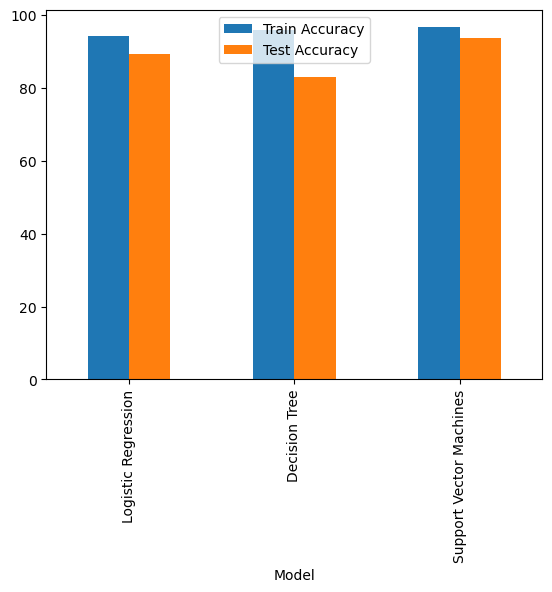

In [245]:
df_model_summary.plot.bar(x='Model')

### Using SVM model as works well on both training and test data

In [261]:
# SVM
# Classification Report for training data
print(classification_report(y_train,y_pred_train_svm))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       400
           1       0.96      0.94      0.95       383
           2       0.96      0.95      0.95       400
           3       0.97      0.99      0.98       417

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600



In [262]:
# Classification Report for test data
print(classification_report(y_test,y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       100
           1       0.94      0.92      0.93       117
           2       0.91      0.93      0.92       100
           3       0.95      0.93      0.94        83

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.93       400



In [264]:
# Precision:- Accuracy of positive predictions
# Recall:- Fraction of positives that were correctly identified
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)